<a href="https://colab.research.google.com/github/Bo-fromLA/SPARKS_internship/blob/main/SPARKS_Dec_Tree_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Decision Tree Algorithm

## Decision Tree Visualization on Iris Dataset
---
---
*Level - Intermediate*

---
done by Botakoz Urazaliyeva for SPARKS GRIP, Aug, 2024

## Tasks:

- create a decision tree, classifier and visualizer graphically.
- the purpose is, if we feed any new data to this classifier, it would be able to predict the right class accordingly.
---

## 1. Importing Libraries
First, we import the necessary libraries for data manipulation, visualization, and machine learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import graphviz
from scipy.stats import randint
from sklearn.tree import export_text

print('Libraries imported successfully')

Libraries imported successfully


## 2. Loading and Quick Exploration of the Dataset
We load the Iris dataset and briefly explore its dimensions and first few rows to make sure this is the dataset we want and not another version.

In [ ]:
df = pd.read_csv('/content/Iris.csv', index_col='Id')
print('Dimensions of the Iris dataset are:', df.shape)
print(df.head())

Dimensions of the Iris dataset are: (150, 5)
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


## 3. Encoding Target Variable
We encode the target variable 'Species' to numerical values.

In [ ]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

## 4. Defining Features and Target
We define the features (X) and target (y) for the model.

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

## 5. Training Default Decision Tree Classifier
We train a decision tree classifier with default parameters and evaluate using cross-validation.

***i decided to evaluate the dafault model first, then compare it to the one with optimized parameters via hypertuning***

In [ ]:
# Default decision tree classifier
default_tree = DecisionTreeClassifier(random_state=111)
cv_scores_default = cross_val_score(default_tree, X, y, cv=5, scoring='accuracy')
default_accuracy = cv_scores_default.mean()
print(f'Default cross-validation accuracy: {default_accuracy:.4f}')

Default cross-validation accuracy: 0.9600


## 6. Hyperparameter Tuning with Randomized Search
We perform hyperparameter tuning using RandomizedSearchCV to find the best parameters.

In [ ]:
# Defining the parameter distributions for RandomizedSearchCV
params = {
    'max_depth': randint(1, 20),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'random_state': [111]
}

# Initializing the classifier
tree = DecisionTreeClassifier()

# RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=tree, param_distributions=params, n_iter=100, cv=5, random_state=111)
random_search.fit(X, y)

# Establishing the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 111}


## 7. Training Optimized Decision Tree Classifier
We train a decision tree classifier with the best parameters and evaluate using cross-validation.

In [ ]:
optimized_tree = DecisionTreeClassifier(**best_params)
optimized_cv_scores = cross_val_score(optimized_tree, X, y, cv=5, scoring='accuracy')
optimized_accuracy = optimized_cv_scores.mean()

print(f'Optimized cross-validation accuracy: {optimized_accuracy:.4f}')


Optimized cross-validation accuracy: 0.9667


## 8. Fitting and Visualizing the Optimized Decision Tree
We fit the optimized decision tree on the entire dataset and visualize it.

In [ ]:
optimized_tree.fit(X, y)

DecisionTreeClassifier(max_depth=15, min_samples_split=15, random_state=111)

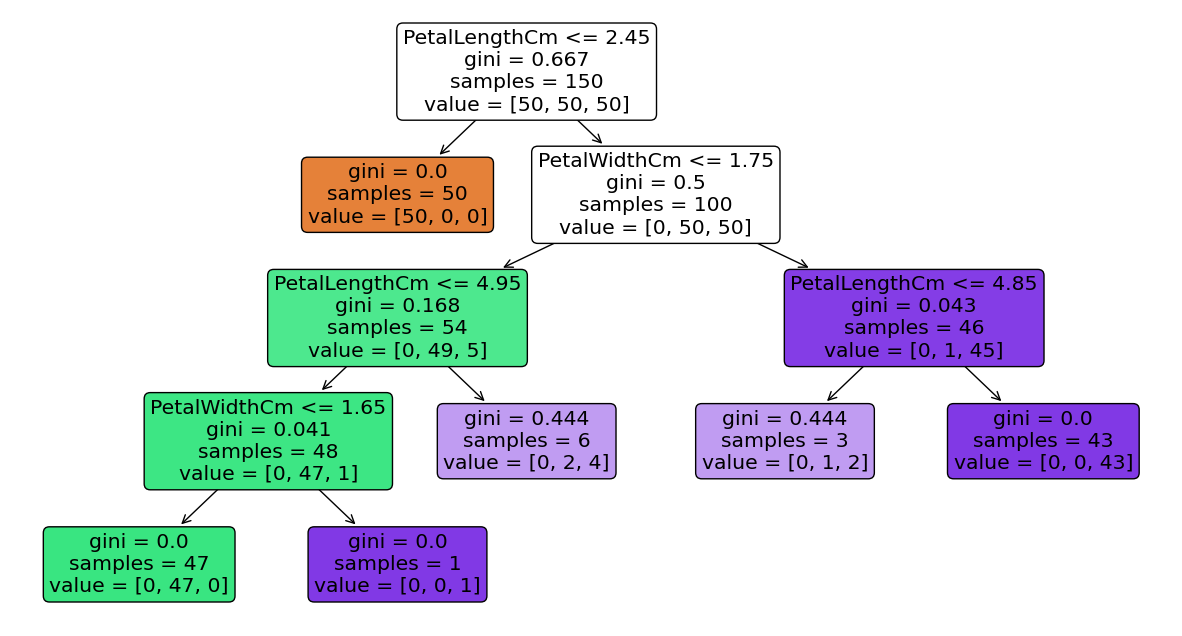

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(optimized_tree, ax=ax, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## 9. Text Representation of the Decision Tree
We provide a text representation of the optimized decision tree as a suppoorting material

In [ ]:
text_representation = export_text(optimized_tree, feature_names=X.columns.tolist())
print(text_representation)

|--- PetalLengthCm <= 2.45
|   |--- class: 0
|--- PetalLengthCm >  2.45
|   |--- PetalWidthCm <= 1.75
|   |   |--- PetalLengthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.95
|   |   |   |--- class: 2
|   |--- PetalWidthCm >  1.75
|   |   |--- PetalLengthCm <= 4.85
|   |   |   |--- class: 2
|   |   |--- PetalLengthCm >  4.85
|   |   |   |--- class: 2



## 10. Exporting and Visualizing Decision Tree with Graphviz
We export the decision tree in DOT format and visualize it using Graphviz.

In [ ]:
dot_data = export_graphviz(
    optimized_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in le.classes_],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2
)

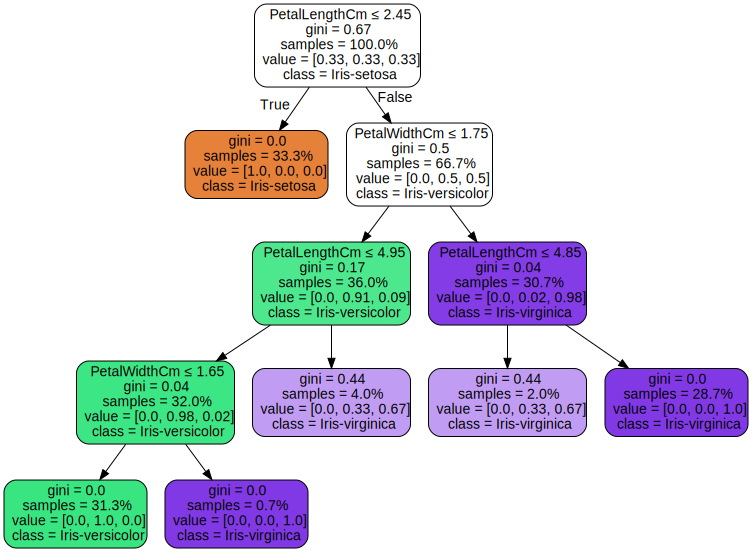

In [ ]:
# Use Graphviz to create a graph from the DOT data
graph = graphviz.Source(dot_data, format="png")
graph.render("iris_tree_optimized", cleanup=True)
graph